## How to Train YOLOv8 Object Detection on a Custom Dataset

In [1]:
!nvidia-smi

Sun Feb 19 16:08:42 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P0    28W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.3/181.3 KB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 15.6 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


## Install YOLOv8

In [3]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=checks

WARNING ⚠️ 'yolo mode=checks' is deprecated. Use 'yolo checks' instead.
Ultralytics YOLOv8.0.40 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.4/78.2 GB disk)


## Train YOLOv8 Model on Custom Dataset

In [10]:
!pip install roboflow --quiet
from roboflow import Roboflow

rf = Roboflow(api_key="T2oNsglLK7hupVVcW8ds")
project = rf.workspace("thesis-dubwt").project("thesis-data-4bu5t")
dataset = project.version(2).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.40, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to Thesis-Data-2 in yolov8:: 100%|██████████| 440/440 [00:00<00:00, 2226.86it/s]


In [11]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=30 imgsz=640

100% 49.7M/49.7M [00:00<00:00, 74.0MB/s]
Ultralytics YOLOv8.0.40 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Thesis-Data-2/data.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, min_memory=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, split=val, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, 

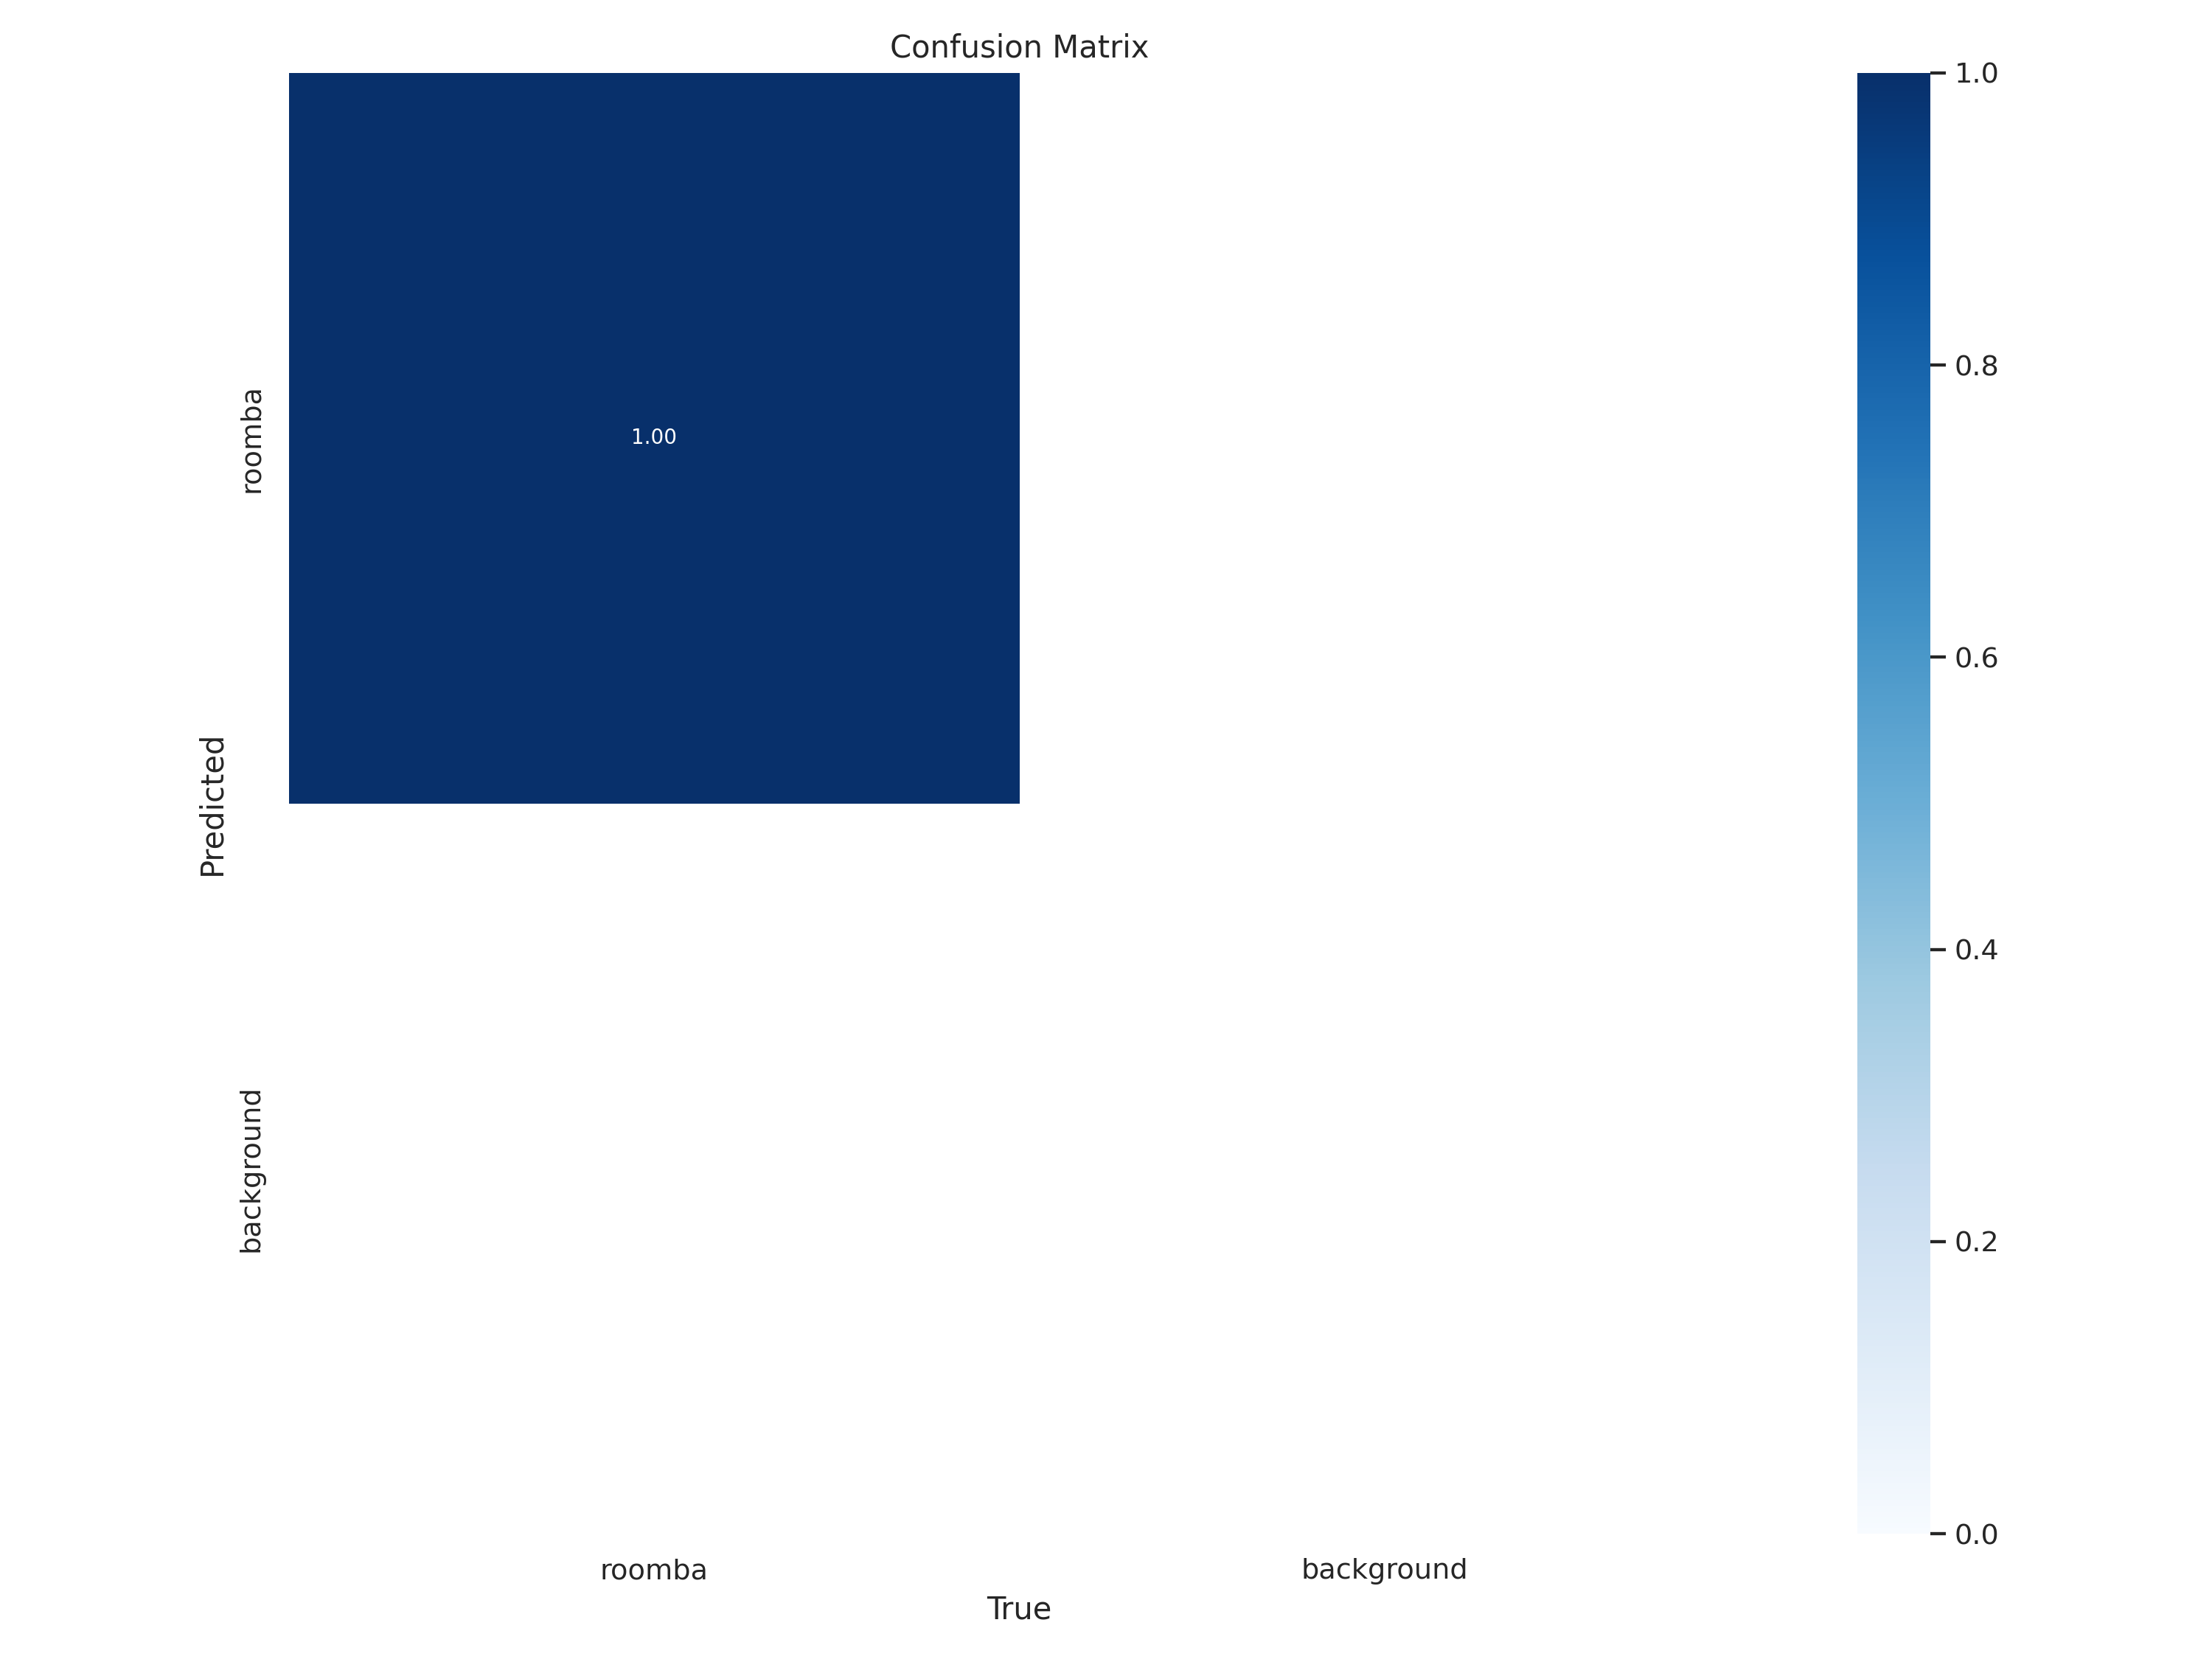

In [12]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

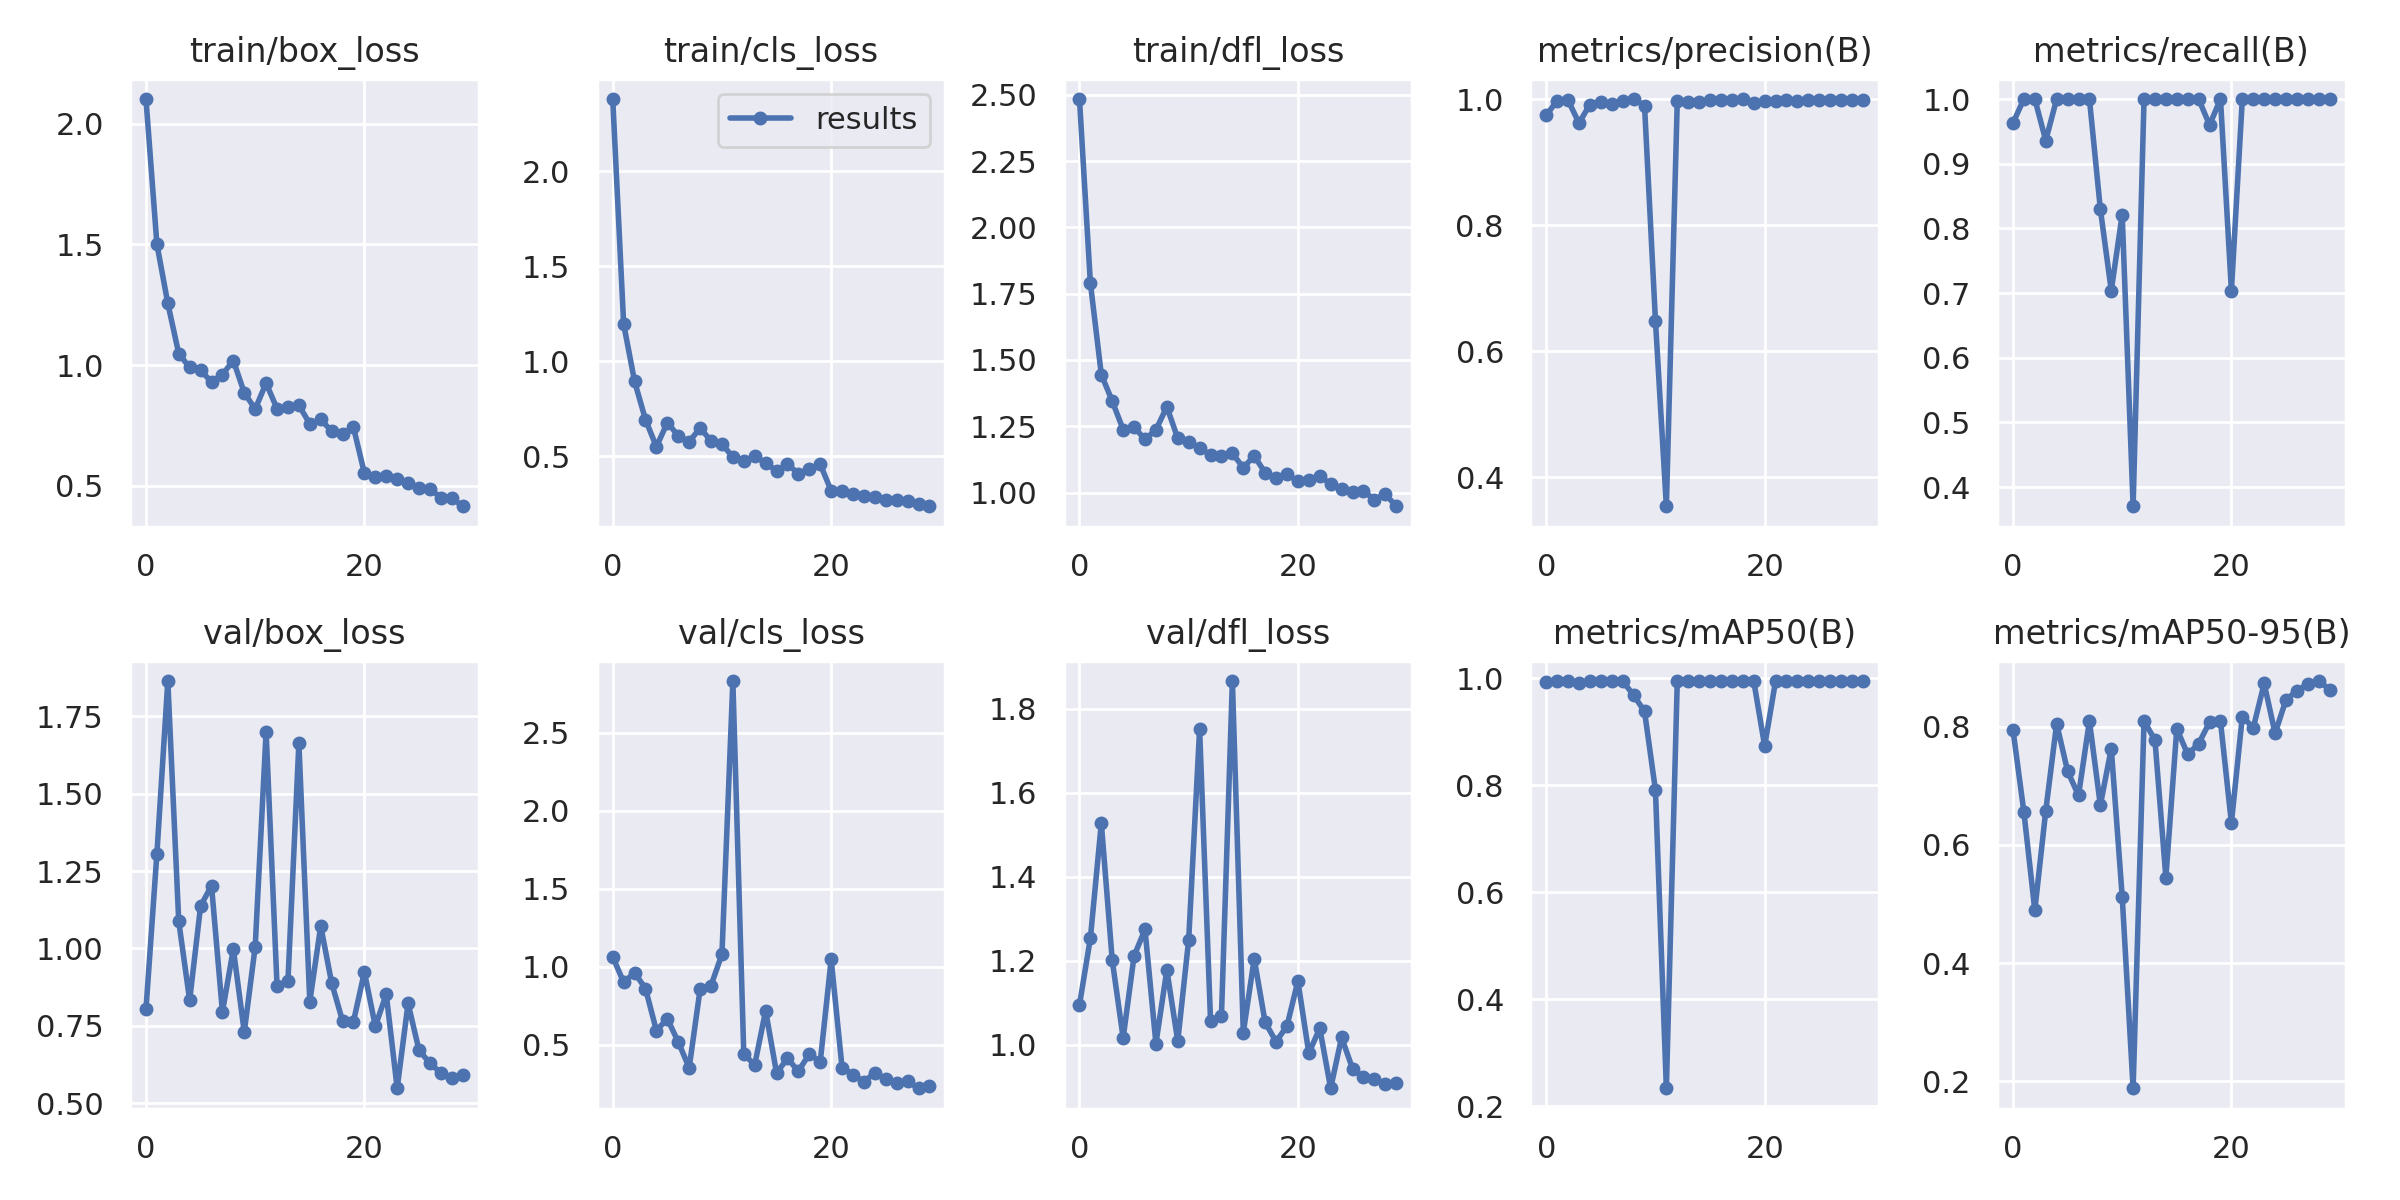

In [13]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

In [21]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.40 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/Thesis-Data-2/valid/labels.cache... 27 images, 0 backgrounds, 0 corrupt: 100% 27/27 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:02<00:00,  1.08s/it]
                   all         27         27      0.998          1      0.995      0.876
Speed: 0.3ms pre-process, 26.3ms inference, 0.0ms loss, 1.5ms post-process per image


In [23]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/valid/images

Ultralytics YOLOv8.0.40 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/27 /content/Thesis-Data-2/valid/images/0_1914_1668876768-4637387_png.rf.6f1302d63305f2e36d1dafb75d173886.jpg: 640x640 1 roomba, 39.1ms
image 2/27 /content/Thesis-Data-2/valid/images/1000_1891_1668876802-6343_png.rf.59ba062f5ca100358fb041c0482870a8.jpg: 640x640 1 roomba, 38.3ms
image 3/27 /content/Thesis-Data-2/valid/images/1000_2127_1668877907-3802836_png.rf.5234bf804feedb3af0ad70bae89fe7c9.jpg: 640x640 1 roomba, 26.0ms
image 4/27 /content/Thesis-Data-2/valid/images/100_1486_1668877116-832912_png.rf.780172598adc96df9af43e0c1db1457f.jpg: 640x640 1 roomba, 26.0ms
image 5/27 /content/Thesis-Data-2/valid/images/100_2169_1668877877-3656373_png.rf.361bddef16648c8b15eedc116178415a.jpg: 640x640 1 roomba, 26.0ms
image 6/27 /content/Thesis-Data-2/valid/images/1010_1880_1668876803-0011454_png.rf.11f2d3227451e35b882ff1714ae

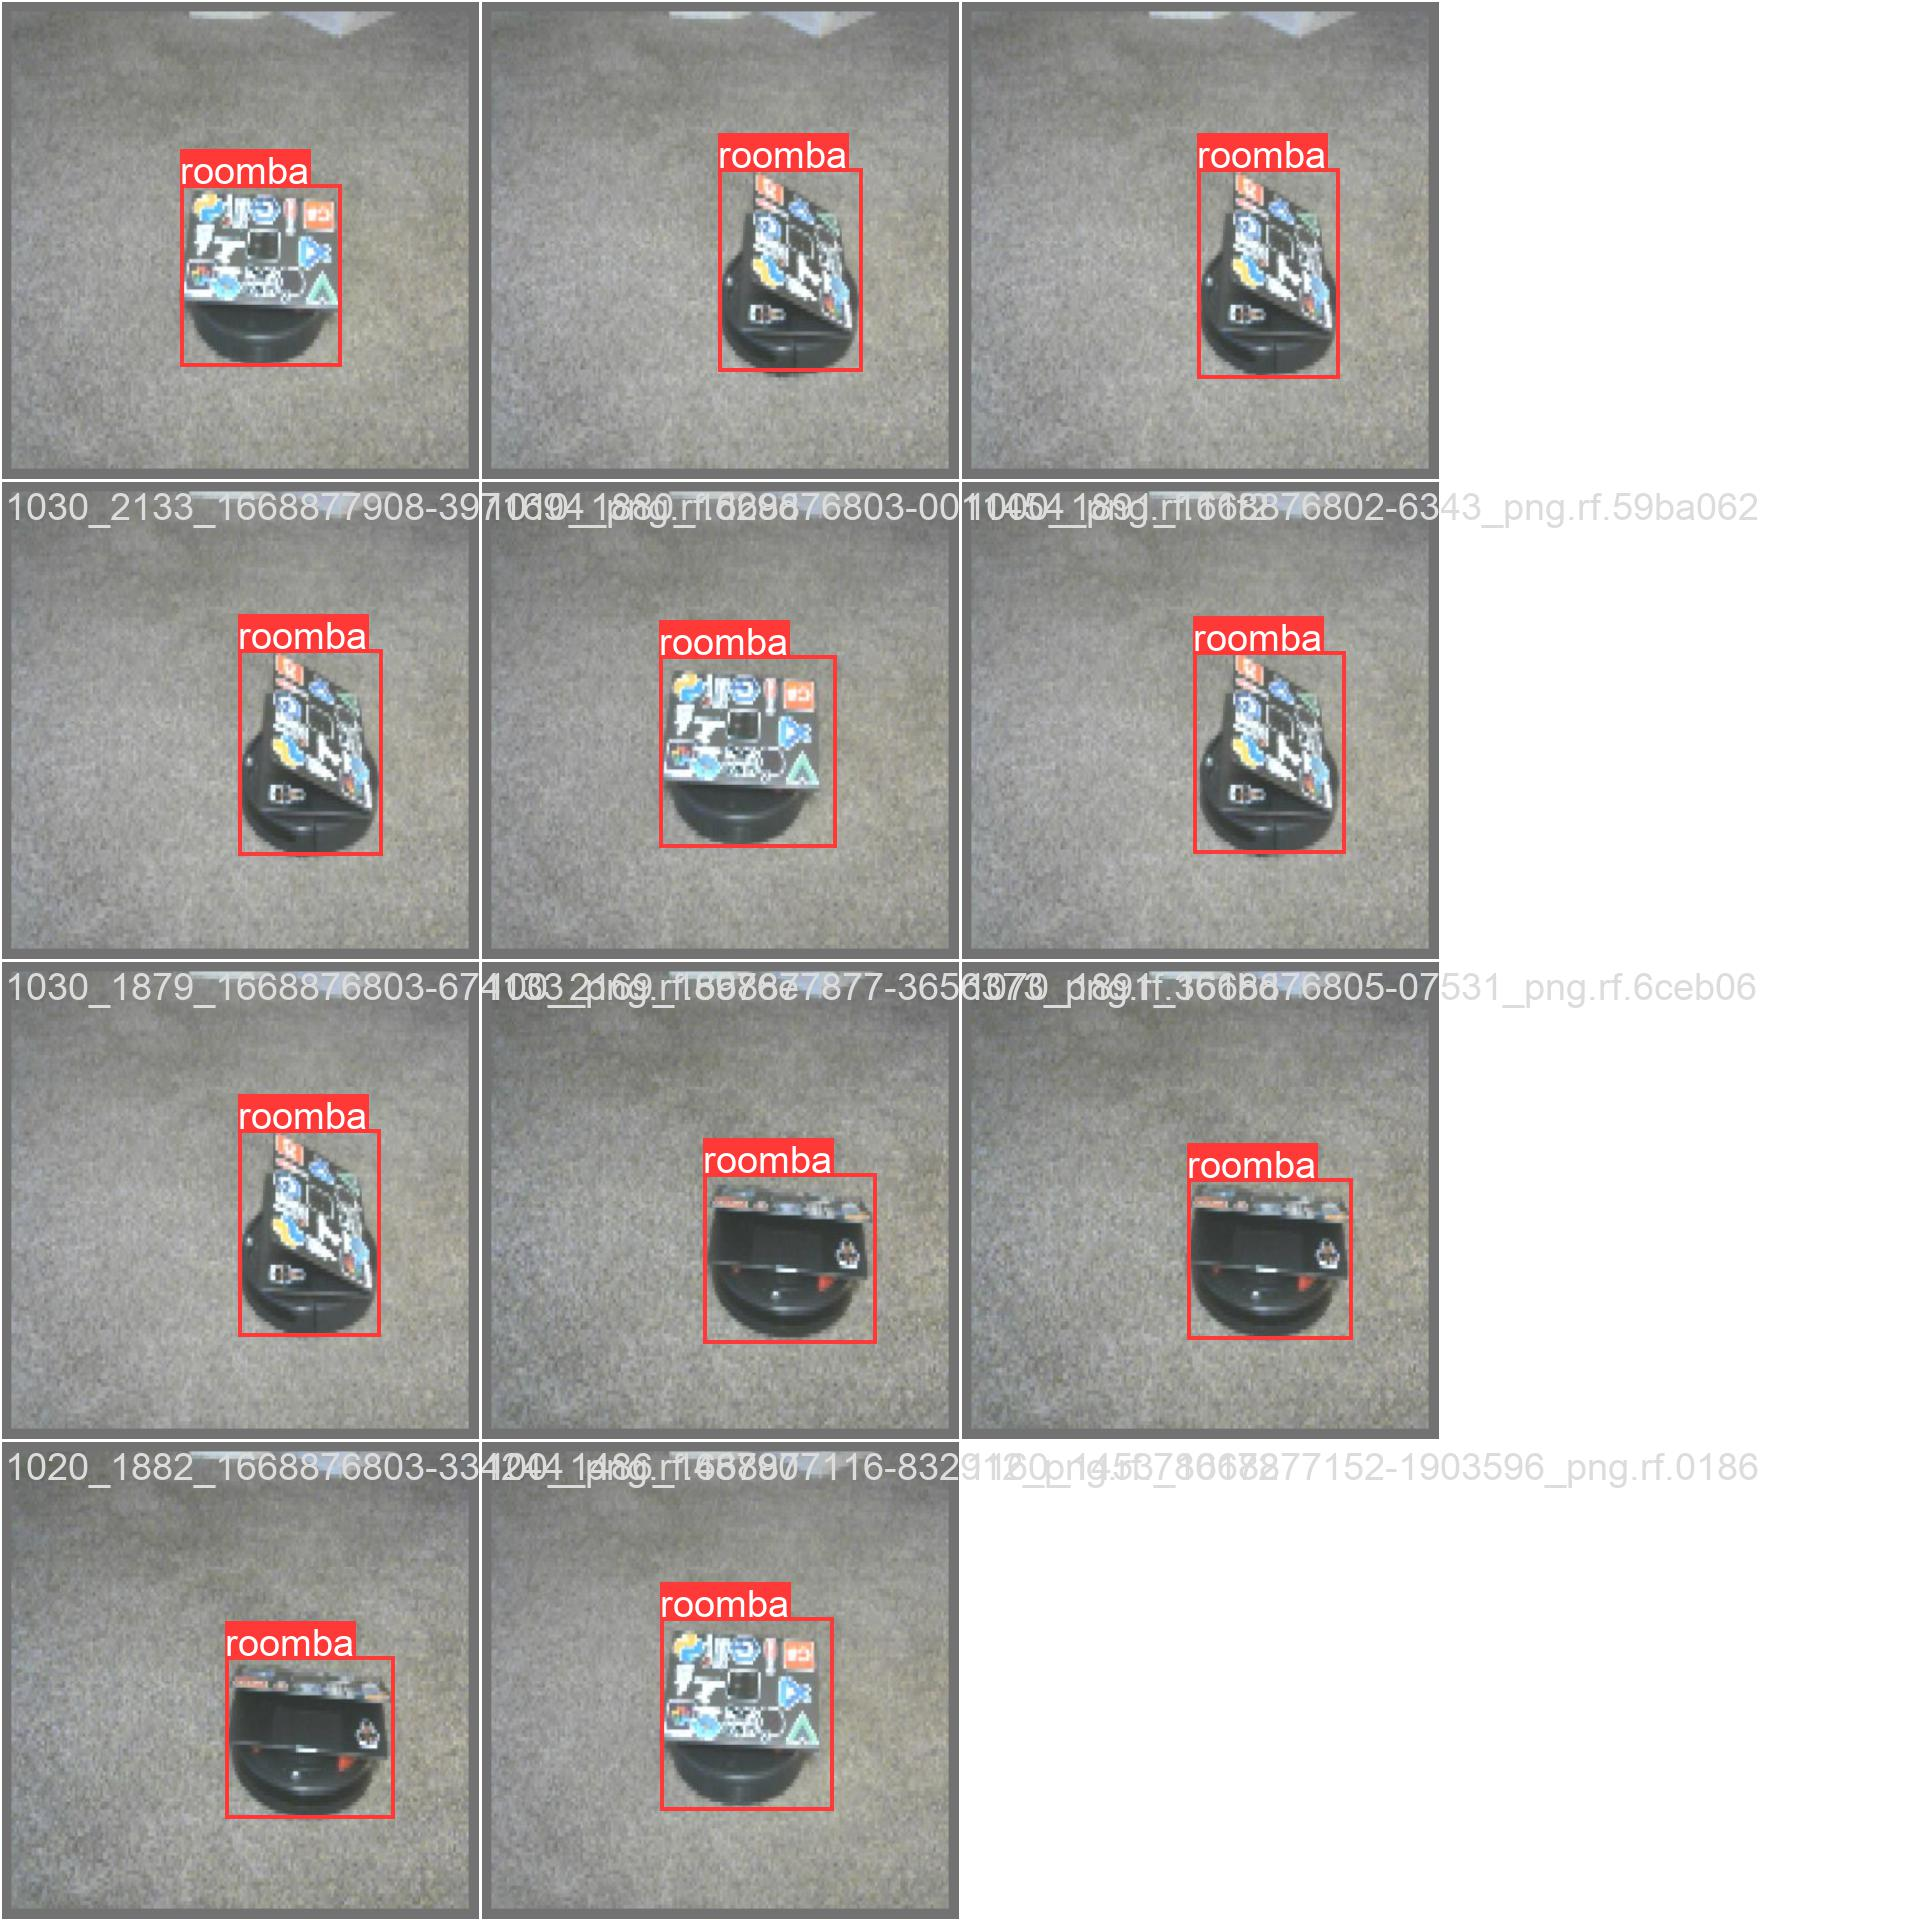

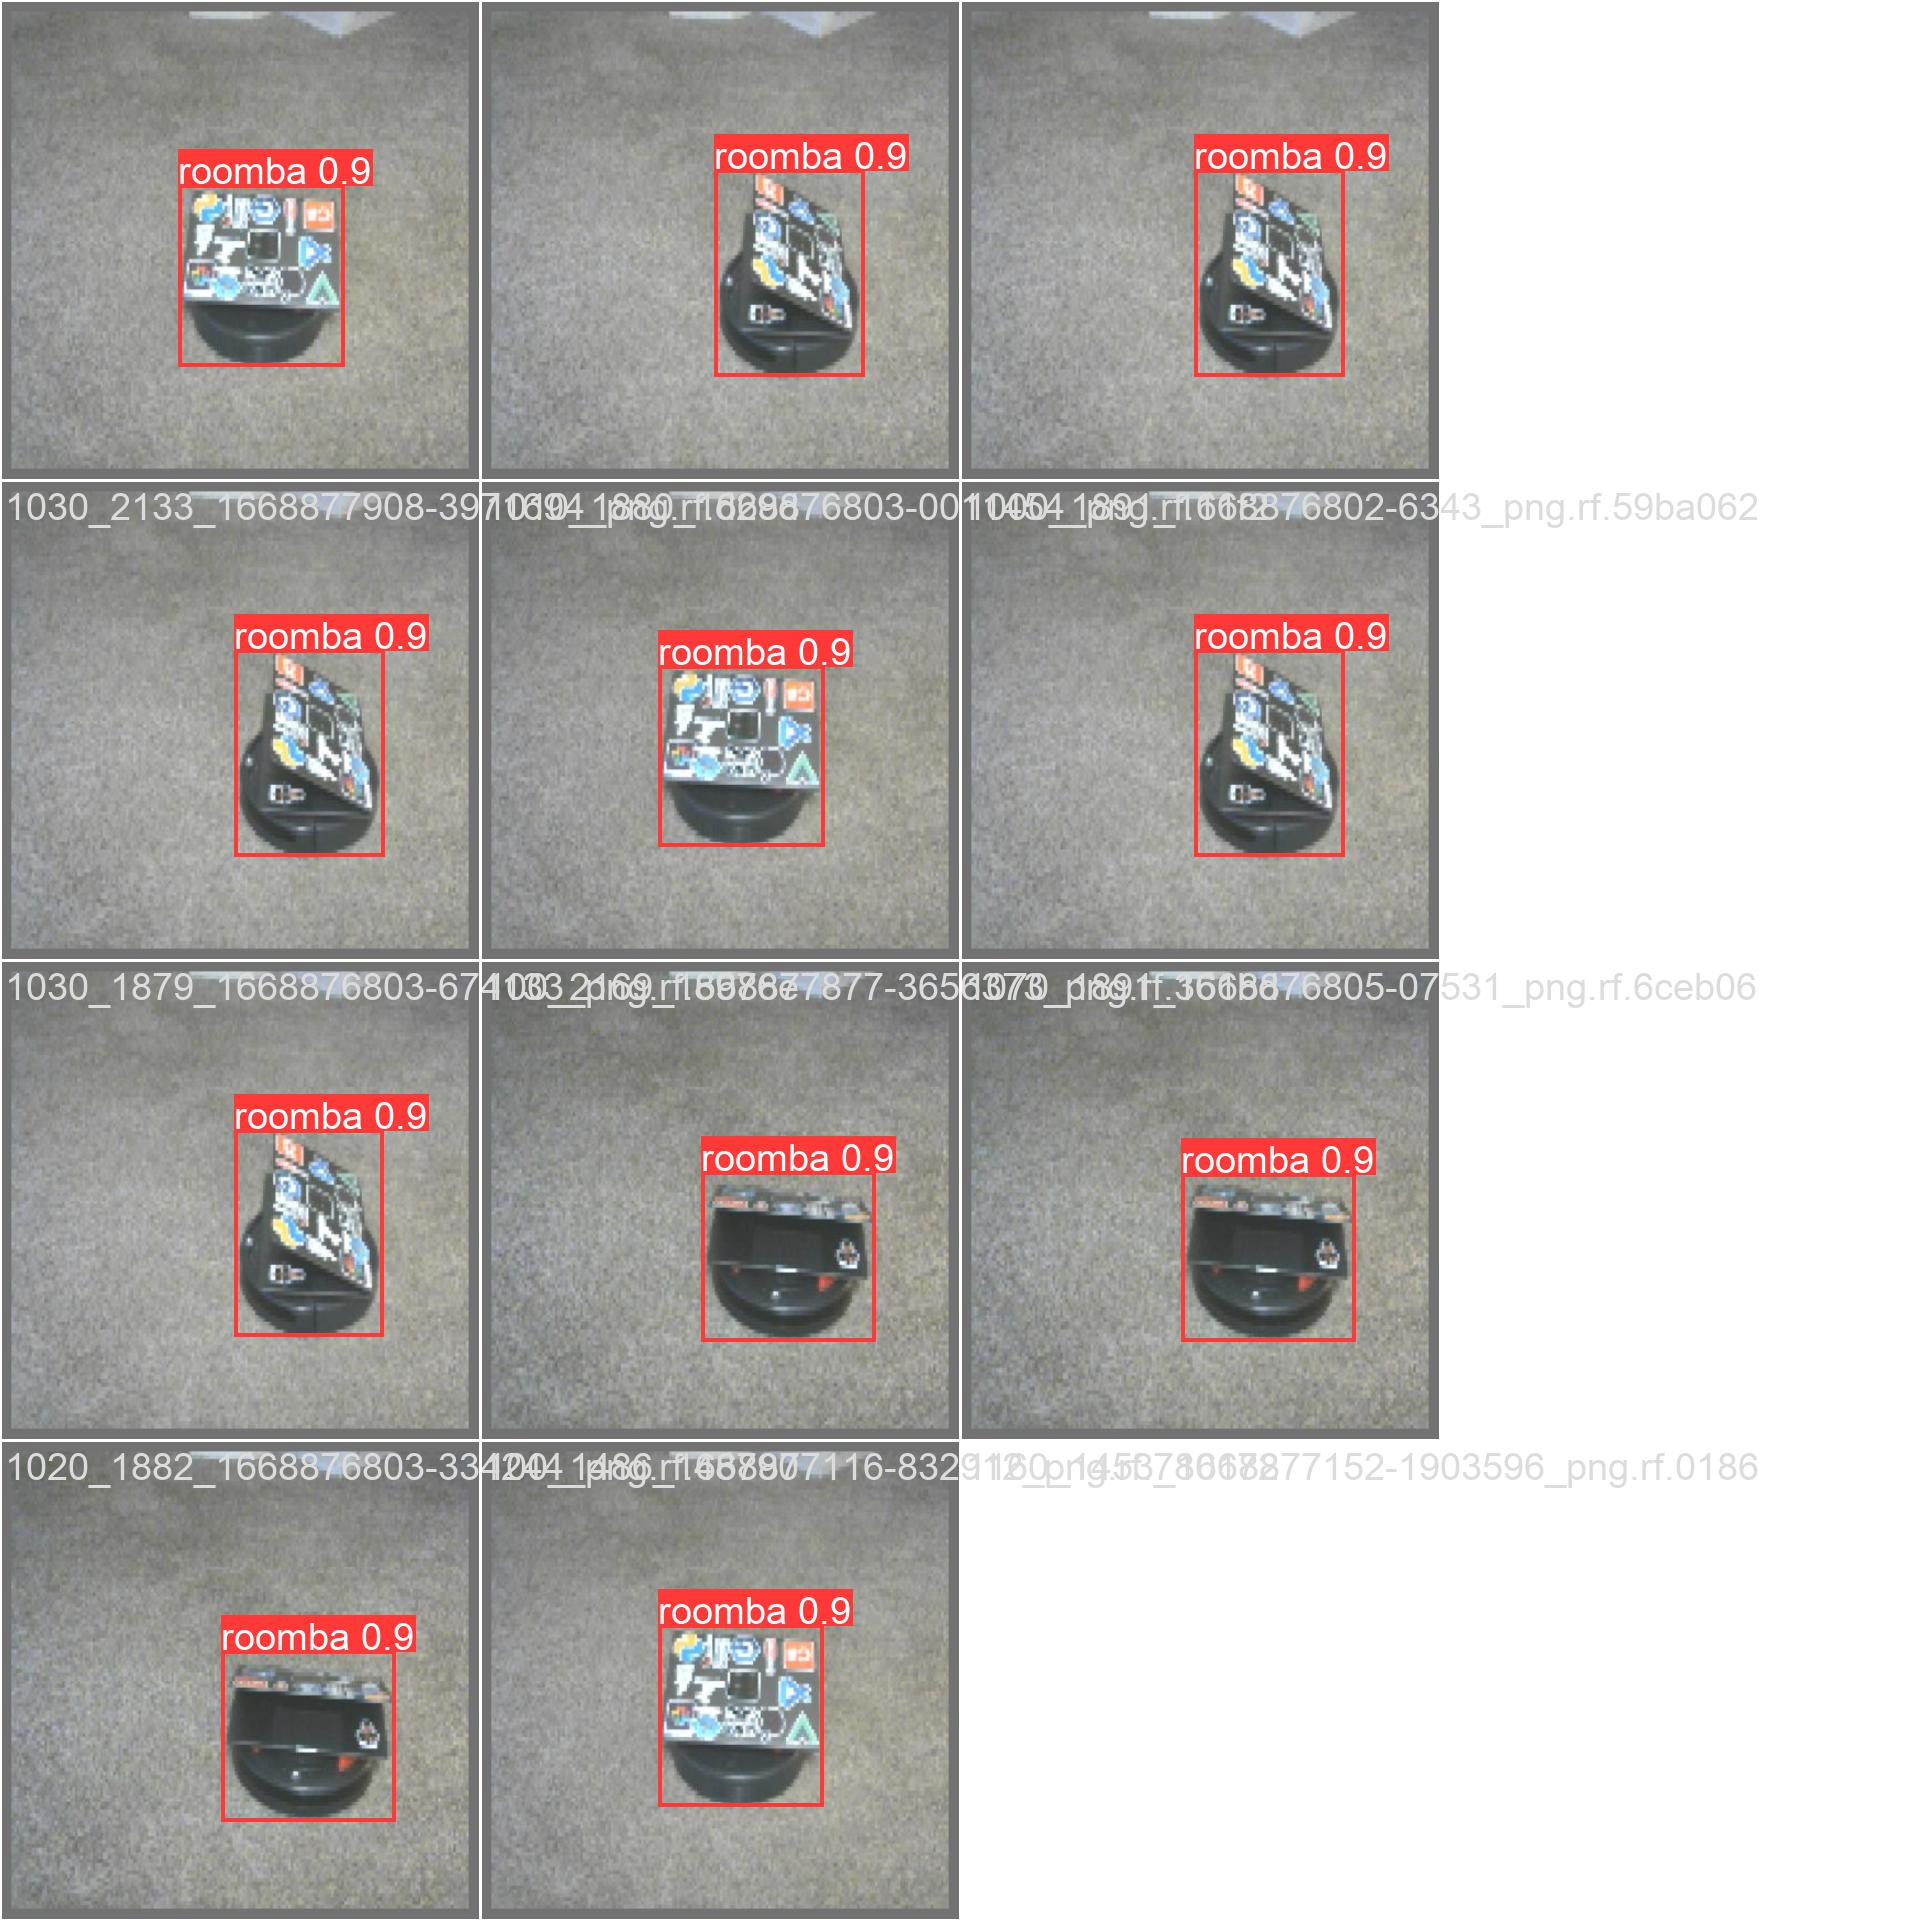

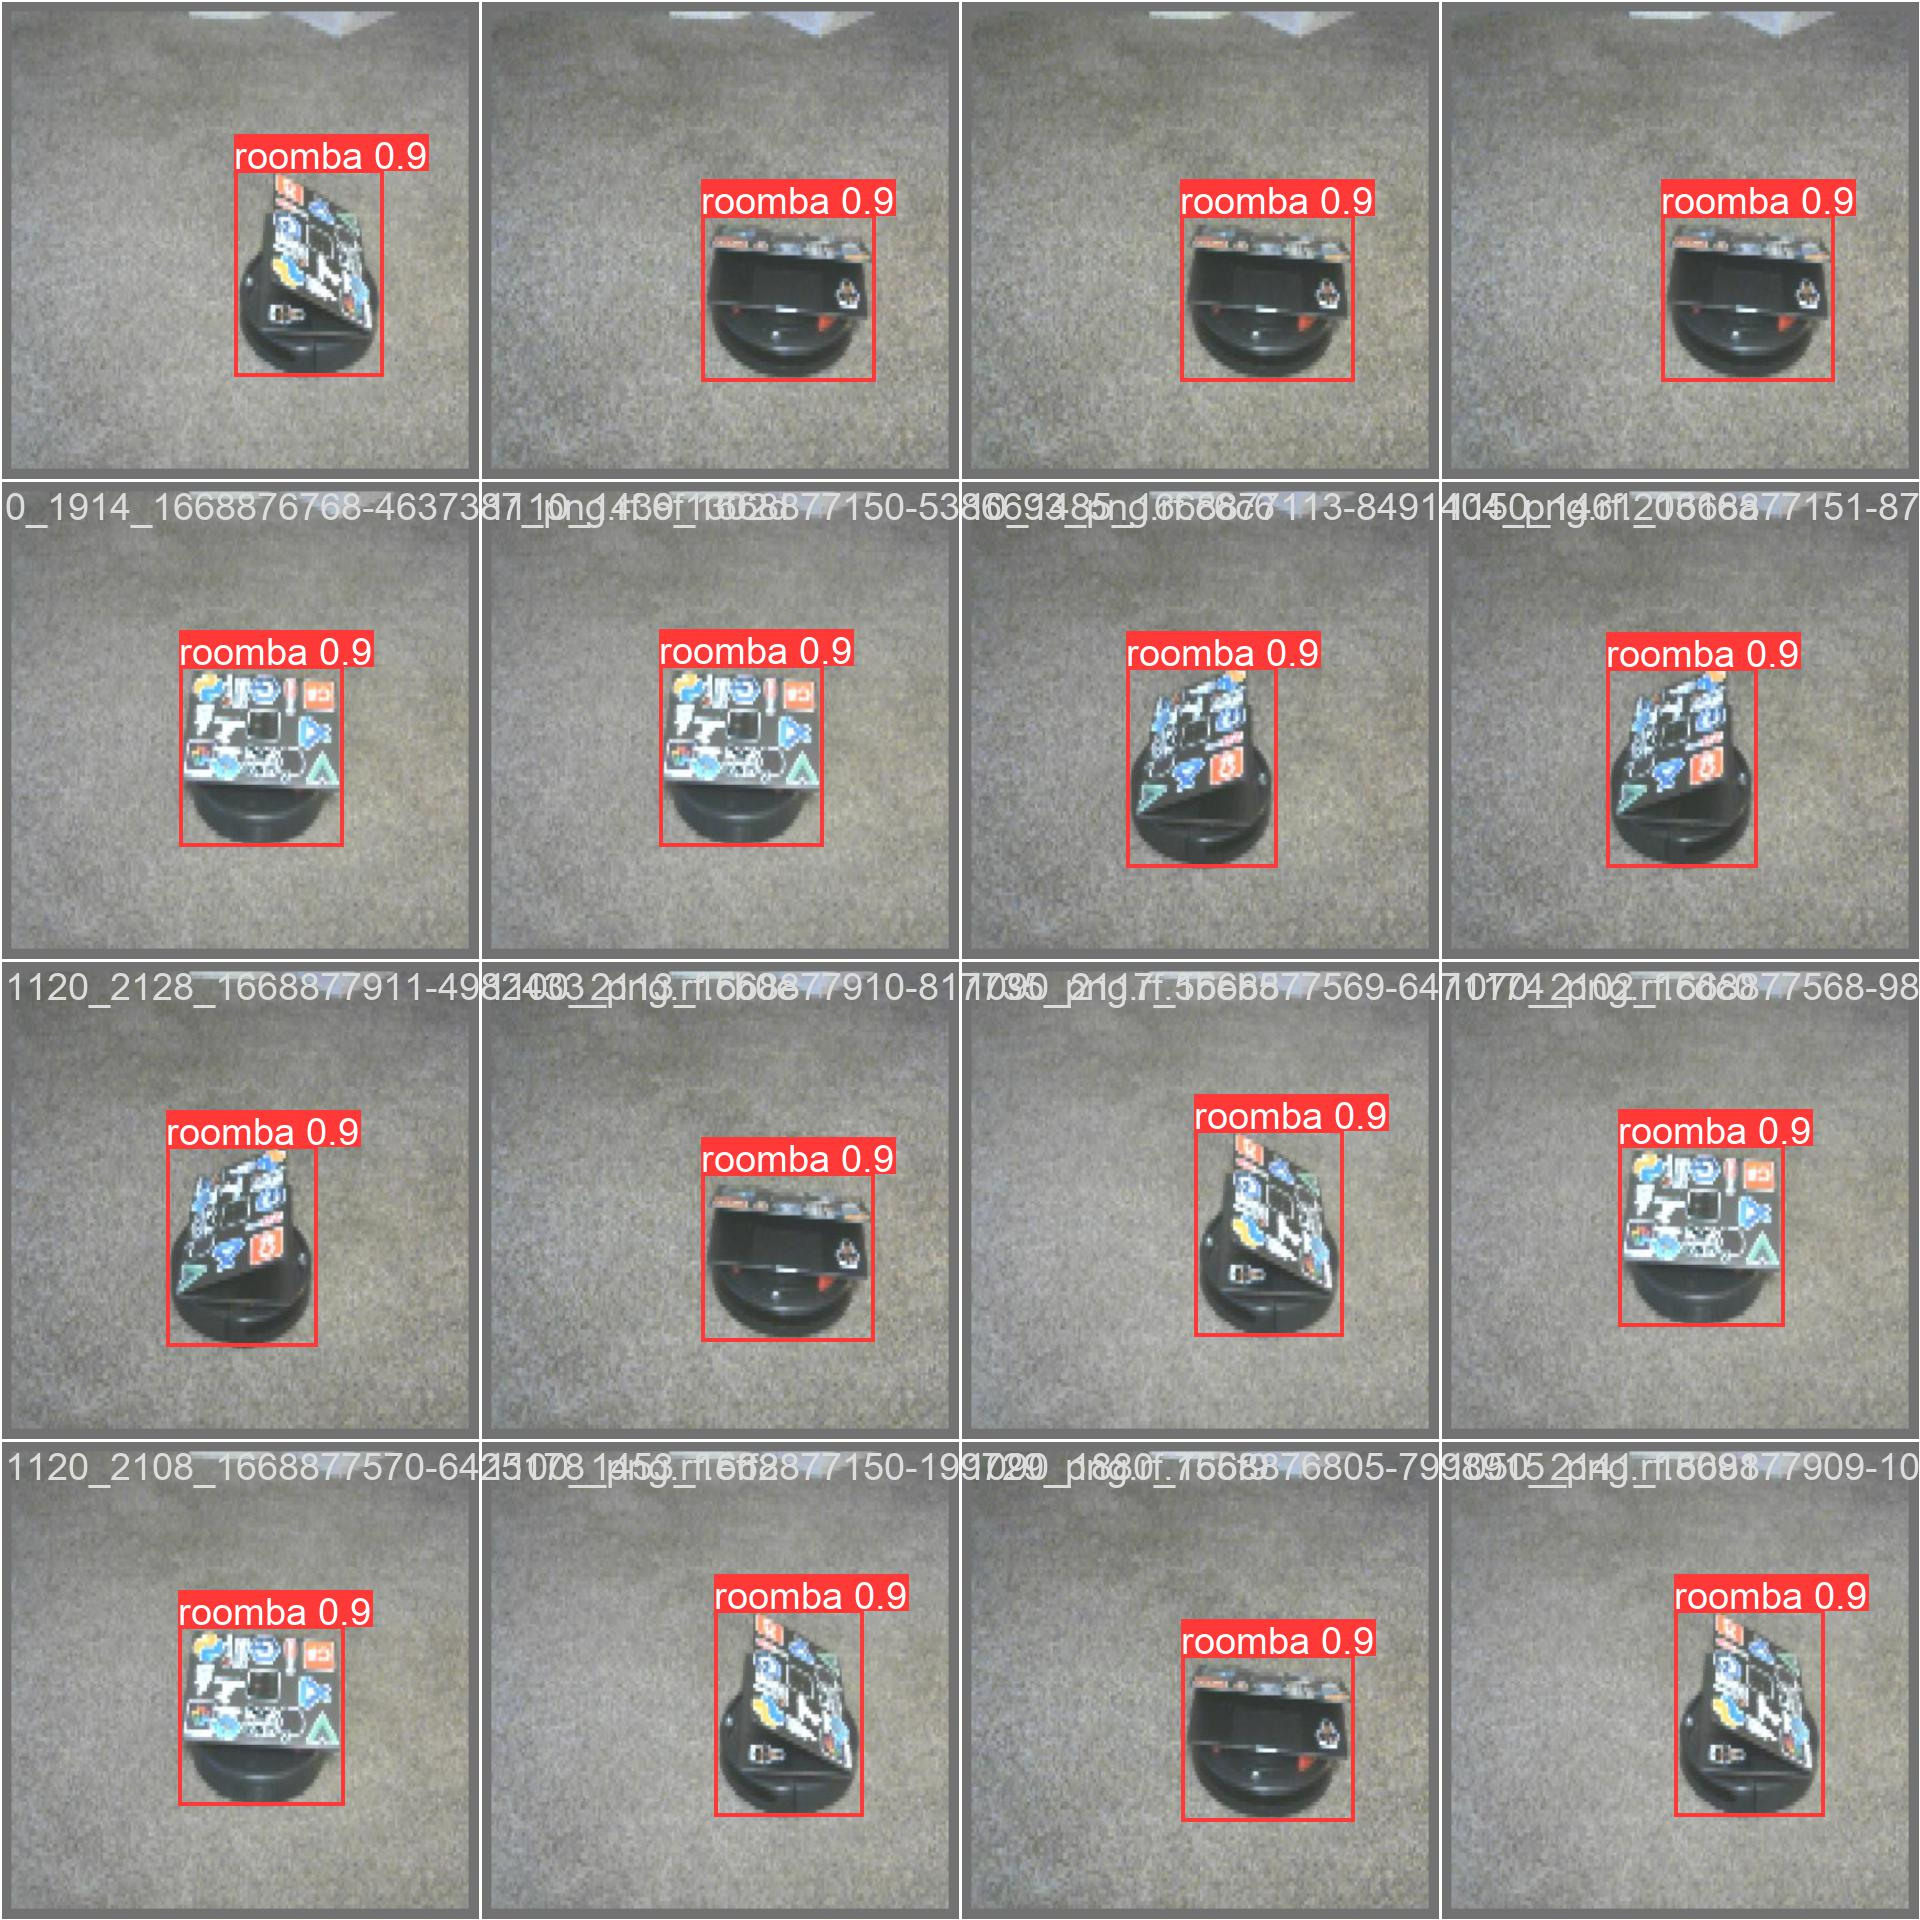

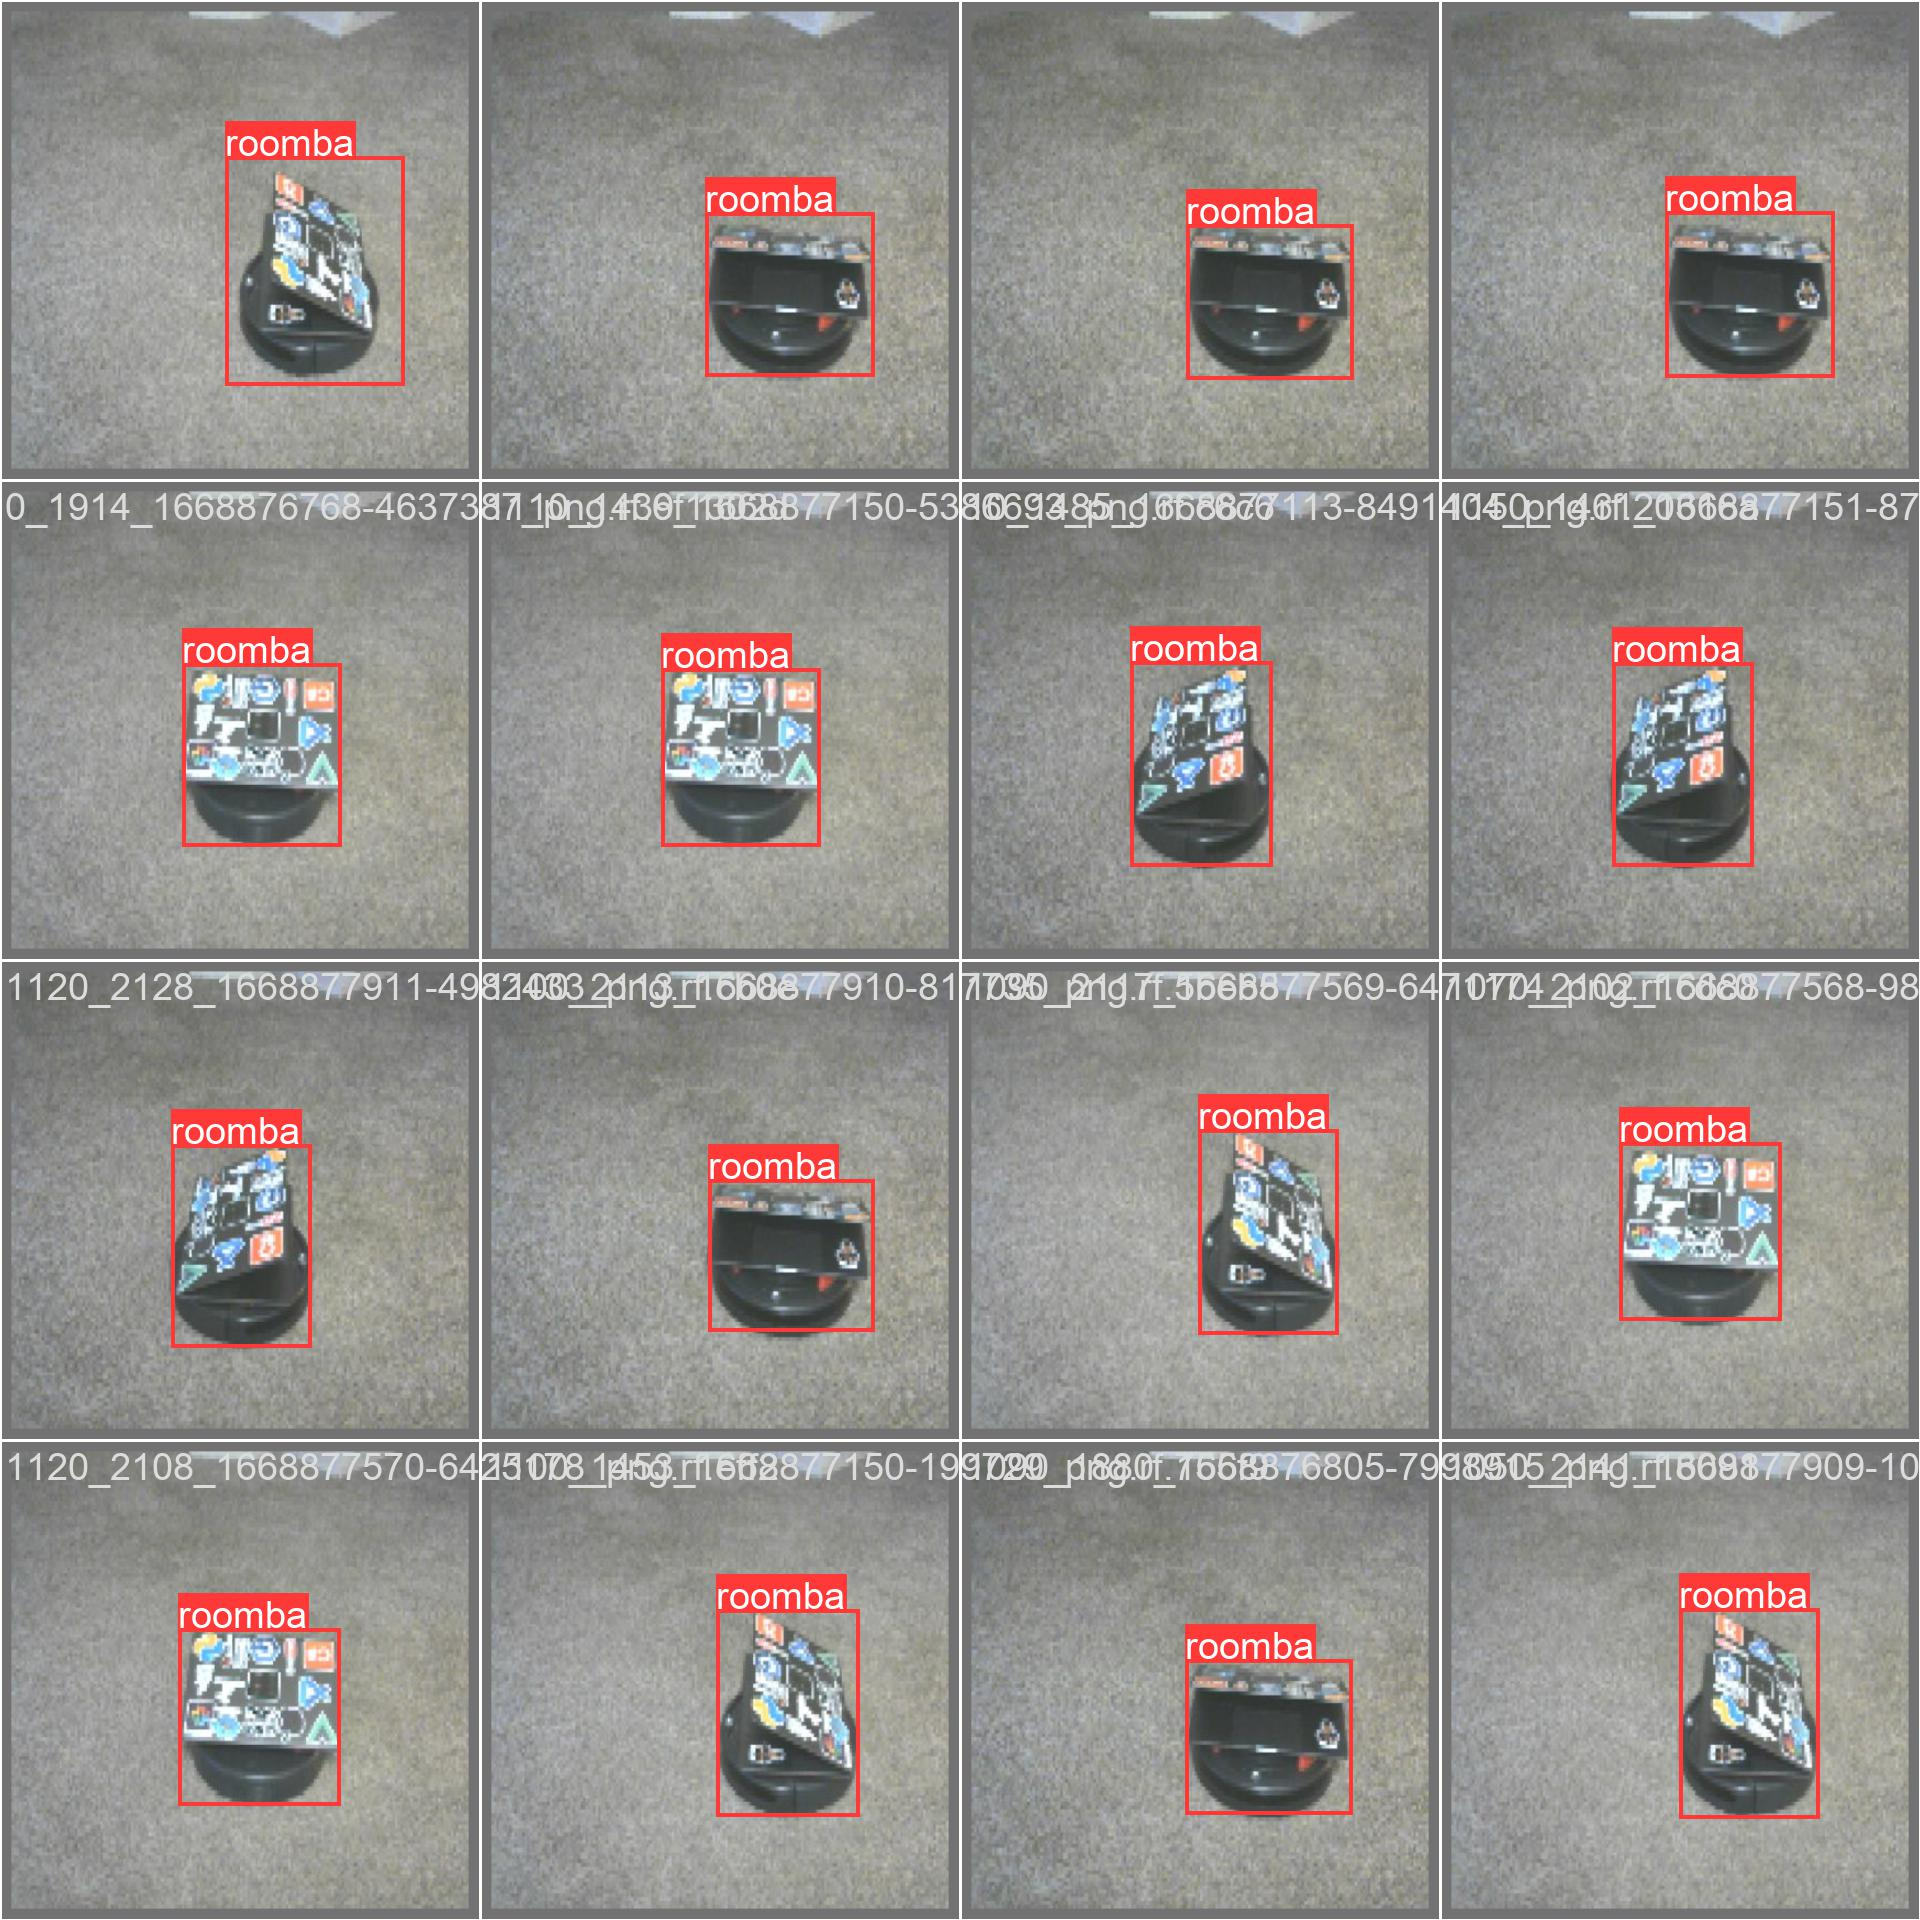

In [25]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/val2/*.jpg')[:5]:
      display(Image(filename=image_path, height=600))
      print("\n")